# Отток клиентов банка

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Переименование столбцов</a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Выделение-признаков-и-разбивка-на-выборки" data-toc-modified-id="Выделение-признаков-и-разбивка-на-выборки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выделение признаков и разбивка на выборки</a></span></li><li><span><a href="#Обучение-модели-без-масштабирования" data-toc-modified-id="Обучение-модели-без-масштабирования-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение модели без масштабирования</a></span></li><li><span><a href="#Обучение-модели-без-учета-балансов" data-toc-modified-id="Обучение-модели-без-учета-балансов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучение модели без учета балансов</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Изменение порога</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общие выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Описание проекта

Из «Бета-Банка» каждый месяц, немного, но заметно, стали уходить клиенты. По подсчетам банковских маркетологов, сохранять текущих клиентов дешевле, чем привлекать новых. Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 

Для исследования предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. Необходимо построить модель с предельно большим значением *F1*-меры (не менее 0.59), а также измерять *AUC-ROC*, сравнивая её значение с *F1*-мерой.

## Подготовка данных

In [1]:
# Импортируем необходимые для работы библиотеки.

import os
import re
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [2]:
# Открываем csv-файл с таблицей и сохраняем его в переменную df.

pth1 = '/datasets/Churn.csv'
pth2 = 'datasets/Churn.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
     print('Проверьте путь к файлу.')

In [3]:
# Просматриваем первые строки датафрейма. 

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
# Просматриваем общую информацию о датафрейме.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
print(f'Процент пропусков в столбце "Tenure": {df["Tenure"].isna().mean():.2%}')

Процент пропусков в столбце "Tenure": 9.09%


In [6]:
# Проверяем уникальные значения и их доли в столбце "HasCrCard".

df['HasCrCard'].value_counts(normalize=True)

1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64

In [7]:
# Проверяем уникальные значения и их доли в столбце "IsActiveMember".

df['IsActiveMember'].value_counts(normalize=True)

1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64

In [8]:
# Проверяем уникальные значения и их доли в столбце "Exited".

df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [9]:
# Проверяем уникальные значения и их доли в столбце "Surname".

df['Surname'].value_counts(normalize=True)

Smith        0.0032
Martin       0.0029
Scott        0.0029
Walker       0.0028
Brown        0.0026
              ...  
Beit         0.0001
Stradford    0.0001
Corson       0.0001
Real         0.0001
Mello        0.0001
Name: Surname, Length: 2932, dtype: float64

In [10]:
# Проверяем уникальные значения и их доли в столбце "Geography".

df['Geography'].value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [11]:
# Проверяем уникальные значения и их доли в столбце "Gender".

df['Gender'].value_counts(normalize=True)

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

In [12]:
# Проверяем процент нулей в каждом столбце.

for column in list(df.columns):
    print(f'Доля нулей в столбце "{column}": '
          f'{df.loc[df[column] == 0, column].count() / df.shape[0]:.0%}')

Доля нулей в столбце "RowNumber": 0%
Доля нулей в столбце "CustomerId": 0%
Доля нулей в столбце "Surname": 0%
Доля нулей в столбце "CreditScore": 0%
Доля нулей в столбце "Geography": 0%
Доля нулей в столбце "Gender": 0%
Доля нулей в столбце "Age": 0%
Доля нулей в столбце "Tenure": 4%
Доля нулей в столбце "Balance": 36%
Доля нулей в столбце "NumOfProducts": 0%
Доля нулей в столбце "HasCrCard": 29%
Доля нулей в столбце "IsActiveMember": 48%
Доля нулей в столбце "EstimatedSalary": 0%
Доля нулей в столбце "Exited": 80%


In [13]:
# Просматриваем статистические характеристики датафрейма.

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
# Проверяем на наличие дубликатов.

print('Количество полных дубликатов:', df.duplicated().sum())

Количество полных дубликатов: 0


In [15]:
# Проверяем количество уникальных значений в столбце "CustomerId".

print('Количество уникальных идентификаторов клиентов:',
      df['CustomerId'].value_counts().count()) 

Количество уникальных идентификаторов клиентов: 10000


In [16]:
# Проверяем на наличие неявных дубликатов сочетание следующих идентифицирующих признаков:
# фамилии, кредитного рейтинга, страны, пола и возраста.

df[df[['Surname', 'CreditScore', 'Geography', 'Gender', 'Age']].duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7869,7870,15693771,Y?an,651,Spain,Female,45,8.0,95922.90,1,1,0,84782.42,1
9885,9886,15574584,Fang,670,France,Male,33,8.0,126679.69,1,1,1,39451.09,0


In [17]:
# Выводим строки с найденными дубликатами.

display(df.query('Surname == "Y?an" and CreditScore == 651 and Geography == "Spain" and Gender == "Female" and Age == 45'))
df.query('Surname == "Fang" and CreditScore == 670 and Geography == "France" and Gender == "Male" and Age == 33')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2300,2301,15647266,Y?an,651,Spain,Female,45,NaN,135923.16,1,1,0,18732.84,0
7869,7870,15693771,Y?an,651,Spain,Female,45,8.0,95922.90,1,1,0,84782.42,1


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7198,7199,15773934,Fang,670,France,Male,33,NaN,88294.60,1,1,0,66979.06,0
9885,9886,15574584,Fang,670,France,Male,33,8.0,126679.69,1,1,1,39451.09,0


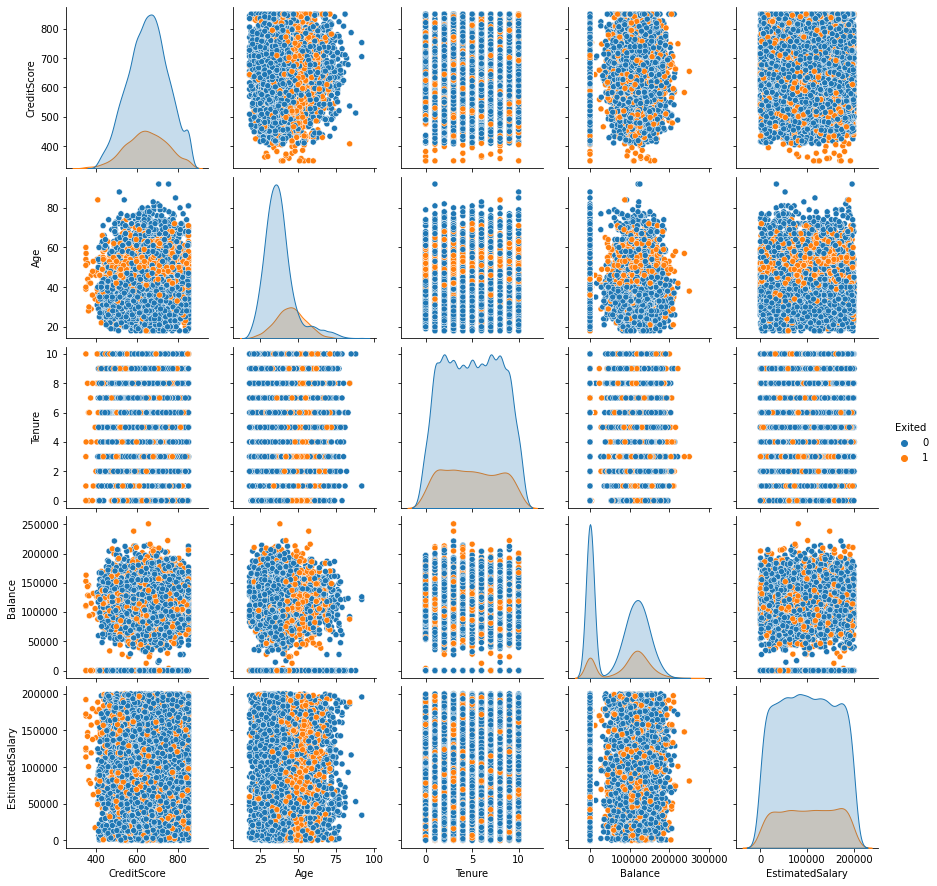

In [18]:
# Просматриваем отношения между всеми парами количественных переменных (для каждого из значений в столбце "Exited"):
# оранжевым отмечено наличие признака, синим - отсутствие.

sns.pairplot(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited']],
             hue='Exited', kind='scatter', diag_kind='auto', height=2.5, aspect=1);

_Выводы_

1. Таблица отображается без проблем. В ней 10000 строк и 14 столбцов.
2. В 3 столбцах ("Surname", "Geography", "Gender") содержатся категориальные данные. Из оставшихся 11 столбцов с численными данными 6 являются собственно количественными ("CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"). Остальные 5 содержат де-факто категориальные данные ("RowNumber", "CustomerId", "HasCrCard", "IsActiveMember", "Exited"), причем последние три из них - бинарные (только 0 и 1).
3. Тип данных в 3 названных столбцах - с именем, страной и полом - object. В столбцах "Tenure", "Balance" и "EstimatedSalary" - float. В остальных - int. Все типы данных подходят для исследования, однако данные в столбце "Tenure" желательно перевести в целочисленный тип.
4. В столбце "Tenure" (количество лет, в течение которых человек является клиентом банка) есть пропущенные значения (более 9%), которые подлежат обработке.
5. Названия всех столбцов необходимо перевести в "змеиный" регистр.
6. Нулевые значения встречаются (среди столбцов с количественными данными) в "Tenure" (4%) и "Balance" (36%), а также в уже упомянутых трех столбцах с бинарными данными: "HasCrCard" (29%), "IsActiveMember" (48%), "Exited" (80%). Все указанные значения вписываются в рамки нормы.
7. Уникальных значений среди категориальных данных: фамилия - 2932 (цифра не вызывает подозрений, учитывая, что клиентами банка могут быть также целые семьи с одинаковыми фамилиями), страна - 3 (Франция, Германия, Испания), пол - 2 (мужской, женский). Аномалий не обнаружено.
8. Аномальных значений в статистиках количественных параметров также не наблюдается. Средние, медианы, максимумы и минимумы в пределах норм.
9. Полных дубликатов среди строк не обнаружено. Уникальных идентификаторов клиентов столько же, сколько и строк - 10000. Найдены две пары строк с совпадающими специфическими характеристиками: фамилия, кредитный рейтинг, страна, пол и возраст. Скорее всего, это одни и те же клиенты, заключившие договор с банком более одного раза. Оставим эти строки без изменения.
10. График "Pairplot" показывает, что корреляций внутри признаков нет. Однако проглядывается другая особенность: возраст большинства отказавшихся от услуг банка клиентов составляет 50-55 лет.

## Предобработка данных

### Переименование столбцов

Переведем названия столбцов в "змеиный" регистр.

In [19]:
# Меняем регистр с "верблюжьего" на "змеиный".
# Выводим новые названия столбцов.

for col in df.columns:
    c = list(col)
    [c.insert(x,'_') for x in [m.start() for m in re.finditer("[A-Z]", col)][:0:-1]]
    df = df.rename(columns={col:''.join(c).lower()})

df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

### Заполнение пропусков

Просмотрим строки таблицы с пропусками в столбце "tenure".

In [20]:
# Первые 10 строк отфильтрованной таблицы

df[df['tenure'].isna()].head(10)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


Никакой закономерности не удается обнаружить. Скорее всего, пропуски были допущены случайным образом.

Проверим это, попробовав обучить модель линейной регрессии. Отберем строки без пропусков и разделим полученную таблицу на признаки (без столбцов "row_number", "customer_id", "surname", "tenure") и целевой признак ("tenure").

In [21]:
# Отбираем строки без пропусков и выделяем признаки и целевой признак.
# Преобразовываем признаки при помощи технологии OHE (one-hot encoding).
# Обучаем модель на исходных данных и, проверив на них же, находим метрику R2.

df1 = df[df['tenure'].notna()]

features1 = df1.drop(['row_number', 'customer_id', 'surname', 'tenure'], axis=1)
target1 = df1['tenure']

features1 = pd.get_dummies(features1, drop_first=True)
print("R2 =", LinearRegression().fit(features1, target1).score(features1, target1))

R2 = 0.0026107864919463486


Как видим, спрогнозированные данные практически случайны.

Таким образом, мы можем заполнить пропуски в исходной таблице рандомными значениями, взятыми из других строк того же столбца "tenure".

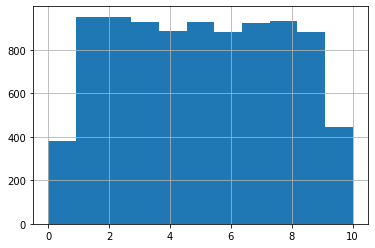

In [22]:
# Просматриваем гистограмму по столбцу "tenure" до заполнения пропусков.

df['tenure'].hist(bins=11)
plt.show()

In [23]:
# Заполняем пропуски в столбце "tenure" случайными значениями из этого же столбца.
# Контрольное число для обеспечения постоянства полученных значений - 49982.

try:
    tenure_list = df[df['tenure'].notna()]['tenure'].to_list()
    random.seed(12345)
    random_tenure = np.array(random.choices(tenure_list, k=909))
    df.loc[df['tenure'].isna(), 'tenure'] = random_tenure
    print('Контрольное число (суммарное значение в столбце "tenure"):', df['tenure'].sum())

except Exception as e:
    print('Ошибка:', e)
    print('Возможно, Вы уже заполнили пропуски.')
    print('Количество пропусков:', df['tenure'].isna().sum())

Контрольное число (суммарное значение в столбце "tenure"): 49982.0


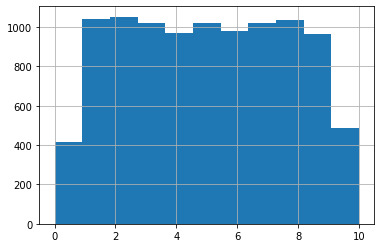

In [24]:
# Просматриваем гистограмму по столбцу "tenure" после заполнения пропусков.

df['tenure'].hist(bins=11)
plt.show()

In [25]:
# Просматриваем общую информацию о датафрейме.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Все пропуски успешно заполнены.

_Итоги_

1. Названия всех столбцов переведены из "верблюжьего" в "змеиный" регистр.


2. Для заполнения пропусков в столбце "Tenure" необходимо было проверить, есть ли какая-либо закономерность в заполнении данных этого столбца. После обучения модели линейной регрессии коэффициент детерминации показал, что данные прогнозируются не лучше, чем у случайной модели. Поэтому решено заполнить пропуски рандомно выбранными из того же столбца "tenure" значениями.

## Исследование задачи

### Выделение признаков и разбивка на выборки

In [26]:
# Первые строки исходного датафрейма

df.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Создадим отдельно наборы данных с признаками и целевым признаком. В признаки включим все столбцы исходного датафрейма, за исключением столбца с самим целевым признаком ("exited"), а также бессмысленных для исследования столбцов с порядковыми номерами, идентификаторами, и фамилиями.

In [27]:
# Выделяем DataFrame с признаками и Series с целевым признаком.

features = df.drop(['row_number', 'customer_id', 'surname', 'exited'], axis=1)
target = df['exited']

Просмотрим первые строки полученных наборов данных.

In [28]:
# Первые строки полученного датафрейма (признаки)

features.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10


In [29]:
# Первые строки полученной Series (целевой признак)

target.head()

0    1
1    0
2    1
3    0
4    0
Name: exited, dtype: int64

In [30]:
# Преобразуем датафрейм с помощью техники OHE.
# Чтобы избежать дамми-ловушки, удаляем лишние столбцы.
# Переводим названия появившихся столбцов в нижний регистр.
# Просматриваем первые строки датафрейма.

features = pd.get_dummies(features, drop_first=True)
features.columns = features.columns.str.lower()
features.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0


Разобьем каждый набор данных (features и target) на три части: обучающую, валидационную и тестовую, в пропорции 3:1:1.

Сделаем это в два этапа: сначала выделим тестовые части, затем из оставшихся - валидационные.

In [31]:
# Разбиваем features и target на две части (обучающие и тестовые) в пропорции 4:1.

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

In [32]:
# Разбиваем обучающие части, выделяя из них валидационные, в пропорции 3:1.

features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345)

Проверим размеры получившихся выборок и просмотрим их первые строки.

In [33]:
print(f'1. Размеры обучающей выборки: "features_train" - {features_train.shape}, "target_train" - {target_train.shape}.')

1. Размеры обучающей выборки: "features_train" - (6000, 11), "target_train" - (6000,).


In [34]:
# Признаки обучающей выборки

features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
492,639,38,4.0,81550.94,2,0,1,118974.77,0,0,0
6655,554,44,0.0,85304.27,1,1,1,58076.52,0,0,1
4287,714,53,1.0,99141.86,1,1,1,72496.05,1,0,1
42,556,61,2.0,117419.35,1,1,1,94153.83,0,0,0
8178,707,46,7.0,127476.73,2,1,1,146011.55,0,0,0


In [35]:
# Целевой признак обучающей выборки

target_train.head()

492     0
6655    0
4287    1
42      0
8178    0
Name: exited, dtype: int64

In [36]:
print(f'2. Размеры валидационной выборки: "features_valid" - {features_valid.shape}, "target_valid" - {target_valid.shape}.')

2. Размеры валидационной выборки: "features_valid" - (2000, 11), "target_valid" - (2000,).


In [37]:
# Признаки валидационной выборки

features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
2358,669,43,1.0,163159.85,1,0,1,15602.80,0,0,1
8463,526,49,2.0,0.00,1,1,0,114539.67,0,1,1
163,721,36,2.0,0.00,2,1,1,106977.80,0,1,0
3074,614,44,6.0,118715.86,1,1,0,133591.11,1,0,0
5989,668,53,10.0,110240.04,1,0,0,183980.56,0,0,0


In [38]:
# Целевой признак валидационной выборки

target_valid.head()

2358    0
8463    1
163     0
3074    1
5989    1
Name: exited, dtype: int64

In [39]:
print(f'3. Размеры тестовой выборки: "features_test" - {features_test.shape}, "target_test" - {target_test.shape}.')

3. Размеры тестовой выборки: "features_test" - (2000, 11), "target_test" - (2000,).


In [40]:
# Признаки тестовой выборки

features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
7867,640,46,3.0,0.00,1,1,1,156260.08,0,1,0
1402,757,29,8.0,130306.49,1,1,0,77469.38,0,0,1
8606,807,42,5.0,0.00,2,1,1,74900.90,0,1,1
8885,668,45,4.0,102486.21,2,1,1,158379.25,0,1,1
6494,699,28,7.0,0.00,2,1,1,22684.78,0,0,1


In [41]:
# Целевой признак тестовой выборки

target_test.head()

7867    0
1402    0
8606    0
8885    0
6494    0
Name: exited, dtype: int64

In [42]:
# Проверяем соотношения выборок.

target_total_length = target_train.shape[0] + target_valid.shape[0] + target_test.shape[0]

print('Доля обучающей выборки:', 
      target_train.shape[0] / target_total_length)
print('Доля валидационной выбороки:', 
      target_valid.shape[0] / target_total_length)
print('Доля тестовой выбороки:', 
      target_test.shape[0] / target_total_length)

Доля обучающей выборки: 0.6
Доля валидационной выбороки: 0.2
Доля тестовой выбороки: 0.2


Выборки готовы для начала обучения.

### Обучение модели без масштабирования

Количественные признаки в выборках имеют разные масштабы.

Перед тем как устранять дисбаланс в целевом признаке, сначала обучим модели без масштабирования признаков. Используем для обучения "логистическую регрессию", "дерево решений" и "случайный лес".

Для удобства и краткости кода создадим функцию для вывода графиков с ROC-кривой, всех метрик (auc_roc, accuracy, precision, recall и f1), а также матрицы ошибок. Она нам понадобится для каждой модели.

In [43]:
# Функция для обучения моделей, а также вывода ROC-кривой, метрик и матрицы ошибок

def metrics(model_name):
    
    if thr == False:
        model_name.fit(ft, tt)
        probabilities_valid = model_name.predict_proba(fv)  
        predicted_valid = model_name.predict(fv)
    
    else:
        model_name.fit(ft, tt)
        probabilities_valid = model_name.predict_proba(fv)  
        predicted_valid = probabilities_valid[:, 1] > best_threshold
        p_r_curve()
        print('Лучший порог:', best_threshold)
    
    auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
    print('\nПлощадь под ROC-кривой:', auc_roc)

    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_valid[:, 1])
    plt.figure()
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, linestyle='--')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

    accuracy = accuracy_score(target_valid, predicted_valid)
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    matrix = confusion_matrix(target_valid, predicted_valid)  
    print('МЕТРИКИ')
    print('Правильность:', accuracy)
    print('Точность:', precision)
    print('Полнота:', recall)
    print('F1-мера:', f1)
    print('\nМАТРИЦА ОШИБОК')
    print('Истинно-отрицательные ответы:', matrix[0, 0])
    print('Ложно-отрицательные ответы:', matrix[1, 0])
    print('Истинно-положительные ответы:', matrix[1, 1])
    print('Ложно-положительные ответы:', matrix[0, 1])

Также для отдельного обучения на немасштабированных и масштабированных данных создадим копии выборок с признаками.

In [44]:
# Создаем копии обучающей, валидационной и тестовой выборок с признаками.

features_train_unscaled = features_train.copy()
features_valid_unscaled = features_valid.copy()
features_test_unscaled = features_test.copy()

In [45]:
# Вводим временные обозначения.

ft = features_train_unscaled
tt = target_train
fv = features_valid_unscaled
thr = False

1. Логистическая регрессия.

Модель: LogisticRegression(random_state=12345, solver='liblinear')

Площадь под ROC-кривой: 0.6814513629376954


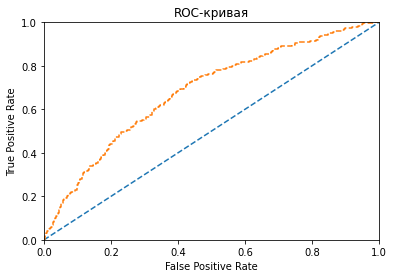

МЕТРИКИ
Правильность: 0.7995
Точность: 0.4107142857142857
Полнота: 0.058823529411764705
F1-мера: 0.10290827740492169

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1576
Ложно-отрицательные ответы: 368
Истинно-положительные ответы: 23
Ложно-положительные ответы: 33


In [46]:
# Обучаем модель LogisticRegression.

model_lr = LogisticRegression(random_state=12345, solver='liblinear')

print('Модель:', model_lr)
metrics(model_lr)

2. Классификатор дерева решений.

Для подбора оптимальных гиперпараметров можно использовать специальные средства (например, GridSearchCv, RandomizedSearchCV и др.), однако для настоящего исследования выполним перебор с помощью обычных циклов.

In [47]:
# Функция для поиска лучшей модели DecisionTreeClassifier, изменяя максимальную глубину.

def best_dt(w=None):
    
    best_result = 0
    best_depth = 0
    best_threshold = 0
    
    for depth in range(1, 16):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight=w)
        model.fit(ft, tt)
        probabilities_valid = model.predict_proba(fv)
        
        if thr == False:
            predicted_valid = model.predict(fv)
        else:
            f1_max = 0
            best_th = 0
            for threshold in np.arange(0.2, 0.5, 0.005):
                predicted = probabilities_valid[:, 1] > threshold
                f1 = f1_score(target_valid, predicted)
                if f1 > f1_max:
                    f1_max = f1
                    best_th = threshold
            predicted_valid = probabilities_valid[:, 1] > best_th
            best_threshold = best_th
            
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_result = result
            best_depth = depth
    
    best_model = DecisionTreeClassifier(random_state=12345,
                                        max_depth=best_depth,
                                        class_weight=w)
    if thr == True:
        return best_model, best_threshold
    
    return best_model

Модель: DecisionTreeClassifier(max_depth=7, random_state=12345)
Лучшая максимальная глубина: 7

Площадь под ROC-кривой: 0.8281207529894979


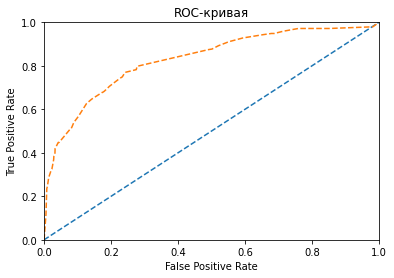

МЕТРИКИ
Правильность: 0.858
Точность: 0.720164609053498
Полнота: 0.4475703324808184
F1-мера: 0.5520504731861199

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1541
Ложно-отрицательные ответы: 216
Истинно-положительные ответы: 175
Ложно-положительные ответы: 68


In [48]:
# Обучаем модели DecisionTreeClassifier.
# Выбираем модель с максимальным значением F1-меры.

model_dt = best_dt()

print('Модель:', model_dt)
print('Лучшая максимальная глубина:', model_dt.max_depth)
metrics(model_dt)

3. Классификатор случайного леса.

In [49]:
# Функция для поиска лучшей модели RandomForestClassifier, изменяя количество деревьев и их максимальную глубину.

def best_rf(w=None):

    best_result = 0
    best_est = 0
    best_depth = 0
    best_threshold = 0

    for est in range(30, 101, 10):             
        for depth in range(6, 16):
            model = RandomForestClassifier(random_state=12345, n_estimators=est,
                                           max_depth=depth, class_weight=w)
            model.fit(ft, tt)
            probabilities_valid = model.predict_proba(fv)

            if thr == False:
                predicted_valid = model.predict(fv)
            else:
                f1_max = 0
                best_th = 0
                for threshold in np.arange(0.2, 0.5, 0.005):
                    predicted = probabilities_valid[:, 1] > threshold
                    f1 = f1_score(target_valid, predicted)
                    if f1 > f1_max:
                        f1_max = f1
                        best_th = threshold                
                predicted_valid = probabilities_valid[:, 1] > best_th
                best_threshold = best_th
                
            result = f1_score(target_valid, predicted_valid)
            if result > best_result:
                best_result = result
                best_est = est
                best_depth = depth
                
    best_model = RandomForestClassifier(random_state=12345,
                                        n_estimators=best_est,
                                        max_depth=best_depth,
                                        class_weight=w)
    if thr == True:
        return best_model, best_threshold
    
    return best_model

Модель: RandomForestClassifier(max_depth=14, n_estimators=40, random_state=12345)
Лучшее количество деревьев: 40
Лучшая максимальная глубина: 14

Площадь под ROC-кривой: 0.8446939291294652


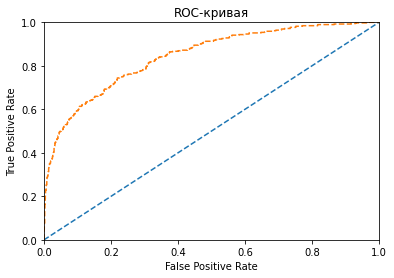

МЕТРИКИ
Правильность: 0.8645
Точность: 0.7564102564102564
Полнота: 0.45268542199488493
F1-мера: 0.5664

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1552
Ложно-отрицательные ответы: 214
Истинно-положительные ответы: 177
Ложно-положительные ответы: 57
CPU times: user 30.4 s, sys: 369 ms, total: 30.8 s
Wall time: 30.8 s


In [50]:
%%time
# Обучаем модели RandomForestClassifier.
# Выбираем модель с максимальным значением F1-меры.
# Время обработки - до 30 сек (!)

model_rf = best_rf()

print('Модель:', model_rf)
print('Лучшее количество деревьев:', model_rf.n_estimators)
print('Лучшая максимальная глубина:', model_rf.max_depth)
metrics(model_rf)

Проверим правильность действий через подбор гиперпараметров GridSearchCV.

In [51]:
%%time
# Подбираем параметры для моделей RandomForestClassifier при помощи GridSearchCV.
# Выбираем модель с максимальным значением F1-меры.
# Время обработки - до 30 сек (!)

# Индексы со значением -1 останутся в обучающей выборке.
# Индексы с нулевым или положительными значениями останутся в тестовой выборке.
train_indices = np.full(len(features_train_unscaled), -1, dtype=int)
test_indices = np.full(len(target_valid), 0, dtype=int)
test_fold = np.append(train_indices, test_indices)
full_x = features_train_unscaled.append(features_valid_unscaled)
full_y = target_train.append(target_valid)
ps = PredefinedSplit(test_fold)

# Подбор параметров
parameters = {'n_estimators': range (30, 101, 10),'max_depth': range (6, 16)}
model = RandomForestClassifier(random_state=12345)
grid = GridSearchCV(model, parameters, scoring='f1', cv=ps)
grid.fit(full_x, full_y)
print(grid.best_params_)

# Обучение модели с наилучшими параметрами
model = RandomForestClassifier(random_state=12345, **grid.best_params_)
model.fit(features_train_unscaled, target_train)
predicted_valid = model.predict(features_valid_unscaled)
print('F1-мера:', f1_score(target_valid, predicted_valid), '\n')

{'max_depth': 14, 'n_estimators': 40}
F1-мера: 0.5664 

CPU times: user 29.9 s, sys: 312 ms, total: 30.2 s
Wall time: 30.5 s


Как видим, максимальное значение F1-меры совпадает с найденным ранее.

### Обучение модели без учета балансов

Теперь масштабируем количественные признаки методом стандартизации.

In [52]:
# Применяем стандартизацию к столбцам с количественными данными
# во всех трех выборках с признаками (обучающей, валидационной и тестовой).

scaler = StandardScaler()
numeric = ['credit_score', 
           'age', 
           'tenure', 
           'balance', 
           'num_of_products', 
           'estimated_salary']
scaler.fit(features_train[numeric])
pd.options.mode.chained_assignment = None

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [53]:
# Просматриваем первые строки преобразованного датафрейма в обучающей выборке

features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
492,-0.134048,-0.078068,-0.352683,0.076163,0.816929,0,1,0.331571,0,0,0
6655,-1.010798,0.494555,-1.733045,0.136391,-0.896909,1,1,-0.727858,0,0,1
4287,0.639554,1.353490,-1.387955,0.358435,-0.896909,1,1,-0.477006,1,0,1
42,-0.990168,2.116987,-1.042864,0.651725,-0.896909,1,1,-0.100232,0,0,0
8178,0.567351,0.685430,0.682589,0.813110,0.816929,1,1,0.801922,0,0,0


Еще раз посмотрим на баланс классов (соотношение нулей и единиц) в целевом признаке.

In [54]:
# Доли "0" и "1" в обучающей выборке с целевым признаком

target_train.value_counts(normalize=True)

0    0.796833
1    0.203167
Name: exited, dtype: float64

Как видим, нули в выборке встречаются вчетверо чаще, чем единицы. Т.е. налицо дисбаланс классов.

Снова обучим модели с помощью тех же структур (но все еще без учета балансов).

In [55]:
# Вводим временные обозначения для краткости кода.

ft = features_train
fv = features_valid

1. Логистическая регрессия.

Модель: LogisticRegression(random_state=12345, solver='liblinear')

Площадь под ROC-кривой: 0.7704631397239631


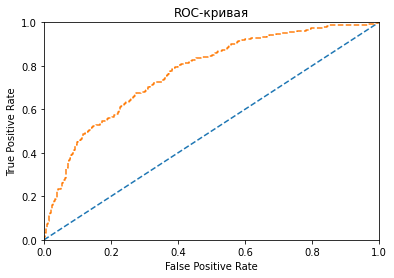

МЕТРИКИ
Правильность: 0.815
Точность: 0.574468085106383
Полнота: 0.2071611253196931
F1-мера: 0.30451127819548873

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1549
Ложно-отрицательные ответы: 310
Истинно-положительные ответы: 81
Ложно-положительные ответы: 60


In [56]:
# Обучаем модель LogisticRegression.

model_lr_1 = LogisticRegression(random_state=12345, solver='liblinear')

print('Модель:', model_lr_1)
metrics(model_lr_1)

2. Классификатор дерева решений.

Модель: DecisionTreeClassifier(max_depth=7, random_state=12345)
Лучшая максимальная глубина: 7

Площадь под ROC-кривой: 0.8281207529894979


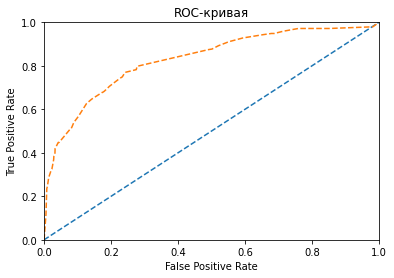

МЕТРИКИ
Правильность: 0.858
Точность: 0.720164609053498
Полнота: 0.4475703324808184
F1-мера: 0.5520504731861199

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1541
Ложно-отрицательные ответы: 216
Истинно-положительные ответы: 175
Ложно-положительные ответы: 68


In [57]:
# Обучаем модели DecisionTreeClassifier.
# Выбираем модель с максимальным значением F1-меры.

model_dt_1 = best_dt()

print('Модель:', model_dt_1)
print('Лучшая максимальная глубина:', model_dt_1.max_depth)
metrics(model_dt_1)

3. Классификатор случайного леса.

Модель: RandomForestClassifier(max_depth=14, n_estimators=40, random_state=12345)
Лучшее количество деревьев: 40
Лучшая максимальная глубина: 14

Площадь под ROC-кривой: 0.8443060851762544


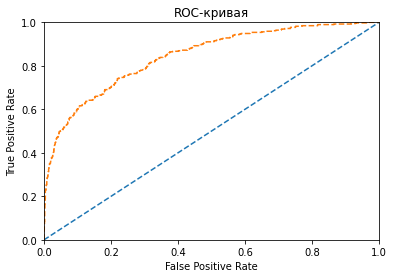

МЕТРИКИ
Правильность: 0.866
Точность: 0.7617021276595745
Полнота: 0.4578005115089514
F1-мера: 0.5718849840255591

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1553
Ложно-отрицательные ответы: 212
Истинно-положительные ответы: 179
Ложно-положительные ответы: 56
CPU times: user 31.4 s, sys: 300 ms, total: 31.7 s
Wall time: 31.7 s


In [58]:
%%time
# Обучаем модели RandomForestClassifier.
# Выбираем модель с максимальным значением F1-меры.
# Время обработки - до 30 сек (!)

model_rf_1 = best_rf()

print('Модель:', model_rf_1)
print('Лучшее количество деревьев:', model_rf_1.n_estimators)
print('Лучшая максимальная глубина:', model_rf_1.max_depth)
metrics(model_rf_1)

_Итоги_

1. Из исходного датафрейма были выделены два набора данных: DataFrame "features" с признаками для обучающей модели (кредитный рейтинг, страна, пол, возраст, срок пребывания в качестве клиента, баланс счета, количество банковских продуктов, наличие кредитной карты, активность клиента, предполагаемая зарплата), а также Series "target" с целевым признаком (факт ухода клиента).


2. Столбцы с категориальными признаками (страна и пол) были преобразованы с помощью техники OHE, с удалением лишних столбцов (для избежания dummy-ловушки). В итоге в таблице на месте столбца "geography" появилось 3 новых (1 из них был удален), а на месте столбца "gender" - 2 новых (1 из них также был удален).


3. Каждый из двух датасетов (features и target) был разбит на три части: 60% - на тренировочную выборку, 20% - на валидационную, 20% - на тестовую.


4. Обнаружен дисбаланс классов в целевом признаке - 4:1 в пользу отрицательного класса. Кроме того, у значений в разных столбцах с количественными признаками имеется разный масштаб. Проведено первичное обучение 3 моделей (логистической регрессии, дерева решений и случайного леса) на несбалансированных и немасштабированных данных. Значения F1-меры составили 0.10, 0.55 и 0.57, соответственно.


5. Произведено масштабирование количественных признаков во всех трех выборках путем их стандартизации. Проведено вторичное обучение моделей. Значения F1-меры составили 0.30, 0.55 и 0.57, соответственно.

## Борьба с дисбалансом

Для борьбы с дисбалансом классов в целевом признаке есть несколько основных подходов, в том числе:
    
- взвешивание классов;
- увеличение выборки (upsampling);
- уменьшение выборки (downsampling);
- изменение порога классификации.

Применим каждый из этих подходов и проведем обучение тех же типов моделей.

### Взвешивание классов

1. Логистическая регрессия.

Модель: LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

Площадь под ROC-кривой: 0.7726503252961681


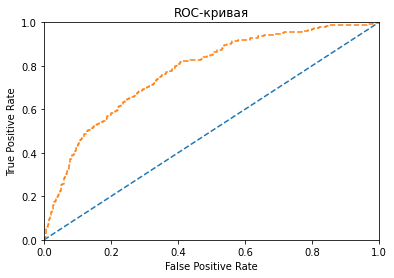

МЕТРИКИ
Правильность: 0.704
Точность: 0.363265306122449
Полнота: 0.6828644501278772
F1-мера: 0.47424511545293074

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1141
Ложно-отрицательные ответы: 124
Истинно-положительные ответы: 267
Ложно-положительные ответы: 468


In [59]:
# Обучаем модель LogisticRegression.

model_lr_2 = LogisticRegression(random_state=12345, solver='liblinear',
                              class_weight='balanced')

print('Модель:', model_lr_2)
metrics(model_lr_2)

2. Классификатор дерева решений.

Модель: DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=12345)
Лучшая максимальная глубина: 6

Площадь под ROC-кривой: 0.8090671240258203


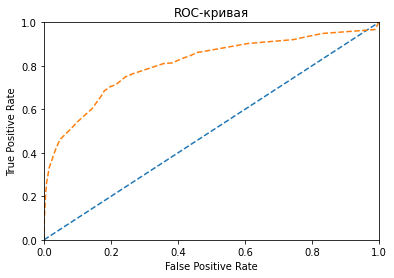

МЕТРИКИ
Правильность: 0.782
Точность: 0.4623115577889447
Полнота: 0.7058823529411765
F1-мера: 0.5587044534412956

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1288
Ложно-отрицательные ответы: 115
Истинно-положительные ответы: 276
Ложно-положительные ответы: 321


In [60]:
# Обучаем модели DecisionTreeClassifier.
# Выбираем модель с максимальным значением F1-меры.

model_dt_2 = best_dt('balanced')

print('Модель:', model_dt_2)
print('Лучшая максимальная глубина:', model_dt_2.max_depth)
metrics(model_dt_2)

3. Классификатор случайного леса.

Модель: RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=30,
                       random_state=12345)
Лучшее количество деревьев: 30
Лучшая максимальная глубина: 10

Площадь под ROC-кривой: 0.8517514174583822


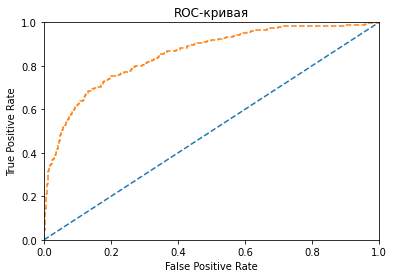

МЕТРИКИ
Правильность: 0.847
Точность: 0.6070528967254408
Полнота: 0.6163682864450127
F1-мера: 0.6116751269035533

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1453
Ложно-отрицательные ответы: 150
Истинно-положительные ответы: 241
Ложно-положительные ответы: 156
CPU times: user 31 s, sys: 455 ms, total: 31.5 s
Wall time: 31.8 s


In [61]:
%%time
# Обучаем модели RandomForestClassifier.
# Выбираем модель с максимальным значением F1-меры.
# Время обработки - до 30 сек (!)

model_rf_2 = best_rf('balanced')

print('Модель:', model_rf_2)
print('Лучшее количество деревьев:', model_rf_2.n_estimators)
print('Лучшая максимальная глубина:', model_rf_2.max_depth)
metrics(model_rf_2)

### Увеличение выборки

Напишем функцию для увеличения выборки и применим ее к обучающим выборкам, увеличив количество строк с положительным классом в целевом признаке в 4 раза. Затем обучим те же модели.

In [85]:
# Функция для увеличения выборки

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [86]:
# Увеличиваем выборки и просматриваем их новые размеры. 

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(f'Размеры увеличенной обучающей выборки: "features_upsampled" - {features_upsampled.shape},'
      f' "target_upsampled" - {target_upsampled.shape}.')
print(f'Количество строк в целевом признаке: с нулями - {(target_upsampled == 0).sum()},'
      f' с единицами - {(target_upsampled == 1).sum()}.')

Размеры увеличенной обучающей выборки: "features_upsampled" - (9657, 11), "target_upsampled" - (9657,).
Количество строк в целевом признаке: с нулями - 4781, с единицами - 4876.


In [87]:
# Вводим временные обозначения.

ft = features_upsampled
tt = target_upsampled

1. Логистическая регрессия.

Модель: LogisticRegression(random_state=12345, solver='liblinear')

Площадь под ROC-кривой: 0.7726741681621442


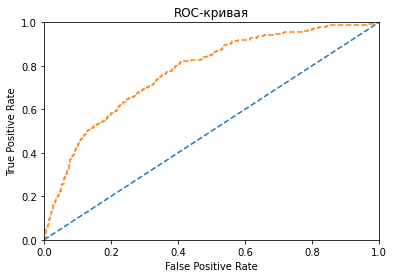

МЕТРИКИ
Правильность: 0.701
Точность: 0.36181575433911883
Полнота: 0.6930946291560103
F1-мера: 0.47543859649122816

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1131
Ложно-отрицательные ответы: 120
Истинно-положительные ответы: 271
Ложно-положительные ответы: 478


In [88]:
# Обучаем модель LogisticRegression.

model_lr_3 = LogisticRegression(random_state=12345, solver='liblinear')

print('Модель:', model_lr_3)
metrics(model_lr_3)

2. Классификатор дерева решений.

Модель: DecisionTreeClassifier(max_depth=6, random_state=12345)
Лучшая максимальная глубина: 6

Площадь под ROC-кривой: 0.809054407830633


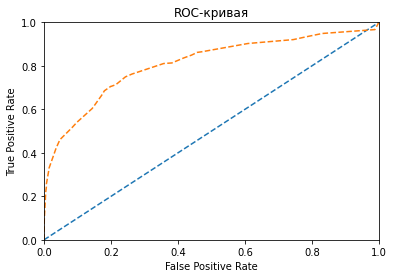

МЕТРИКИ
Правильность: 0.782
Точность: 0.4623115577889447
Полнота: 0.7058823529411765
F1-мера: 0.5587044534412956

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1288
Ложно-отрицательные ответы: 115
Истинно-положительные ответы: 276
Ложно-положительные ответы: 321


In [89]:
# Обучаем модели DecisionTreeClassifier.
# Выбираем модель с максимальным значением F1-меры.

model_dt_3 = best_dt()

print('Модель:', model_dt_3)
print('Лучшая максимальная глубина:', model_dt_3.max_depth)
metrics(model_dt_3)

3. Классификатор случайного леса.

Модель: RandomForestClassifier(max_depth=15, n_estimators=80, random_state=12345)
Лучшее количество деревьев: 80
Лучшая максимальная глубина: 15

Площадь под ROC-кривой: 0.8484364643255093


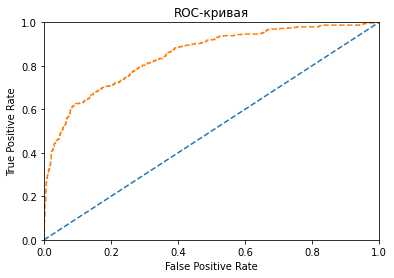

МЕТРИКИ
Правильность: 0.856
Точность: 0.6395663956639567
Полнота: 0.6035805626598465
F1-мера: 0.6210526315789473

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1476
Ложно-отрицательные ответы: 155
Истинно-положительные ответы: 236
Ложно-положительные ответы: 133
CPU times: user 41.4 s, sys: 439 ms, total: 41.8 s
Wall time: 41.9 s


In [90]:
%%time
# Обучаем модели RandomForestClassifier.
# Выбираем модель с максимальным значением F1-меры.
# Время обработки - до 40 сек (!)

model_rf_3 = best_rf()

print('Модель:', model_rf_3)
print('Лучшее количество деревьев:', model_rf_3.n_estimators)
print('Лучшая максимальная глубина:', model_rf_3.max_depth)
metrics(model_rf_3)

### Уменьшение выборки

Напишем функцию для уменьшения выборки и применим ее к обучающим выборкам, уменьшив количество строк с отрицательным классом в целевом признаке в 4 раза. Затем обучим те же модели.

In [94]:
# Функция для уменьшения выборки

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros
                                      .sample(frac=fraction, random_state=12345), features_ones])
    target_downsampled = pd.concat([target_zeros
                                    .sample(frac=fraction, random_state=12345), target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

Модель: LogisticRegression(random_state=12345, solver='liblinear')

Площадь под ROC-кривой: 0.7726741681621442


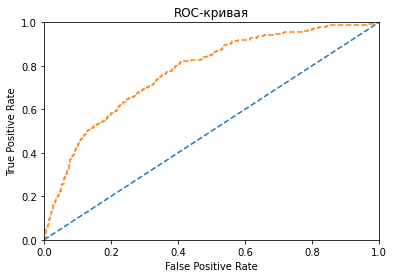

МЕТРИКИ
Правильность: 0.701
Точность: 0.36181575433911883
Полнота: 0.6930946291560103
F1-мера: 0.47543859649122816

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1131
Ложно-отрицательные ответы: 120
Истинно-положительные ответы: 271
Ложно-положительные ответы: 478


In [95]:
# Обучаем модель LogisticRegression.

model_lr_4 = LogisticRegression(random_state=12345, solver='liblinear')

print('Модель:', model_lr_4)
metrics(model_lr_4)

2. Классификатор дерева решений.

Модель: DecisionTreeClassifier(max_depth=6, random_state=12345)
Лучшая максимальная глубина: 6

Площадь под ROC-кривой: 0.809054407830633


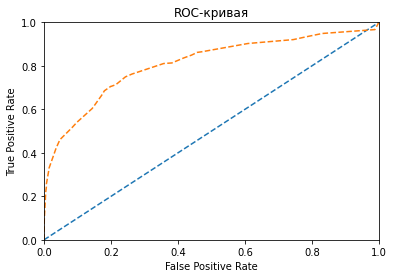

МЕТРИКИ
Правильность: 0.782
Точность: 0.4623115577889447
Полнота: 0.7058823529411765
F1-мера: 0.5587044534412956

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1288
Ложно-отрицательные ответы: 115
Истинно-положительные ответы: 276
Ложно-положительные ответы: 321


In [96]:
# Обучаем модели DecisionTreeClassifier.
# Выбираем модель с максимальным значением F1-меры.

model_dt_4 = best_dt()

print('Модель:', model_dt_4)
print('Лучшая максимальная глубина:', model_dt_4.max_depth)
metrics(model_dt_4)

3. Классификатор случайного леса.

Модель: RandomForestClassifier(max_depth=15, n_estimators=80, random_state=12345)
Лучшее количество деревьев: 80
Лучшая максимальная глубина: 15

Площадь под ROC-кривой: 0.8484364643255093


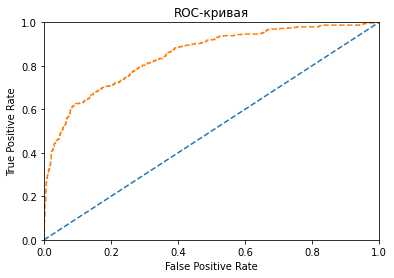

МЕТРИКИ
Правильность: 0.856
Точность: 0.6395663956639567
Полнота: 0.6035805626598465
F1-мера: 0.6210526315789473

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1476
Ложно-отрицательные ответы: 155
Истинно-положительные ответы: 236
Ложно-положительные ответы: 133
CPU times: user 43.5 s, sys: 463 ms, total: 44 s
Wall time: 44.1 s


In [97]:
%%time
# Обучаем модели RandomForestClassifier.
# Выбираем модель с максимальным значением F1-меры.
# Время обработки - до 20 сек (!)

model_rf_4 = best_rf()

print('Модель:', model_rf_4)
print('Лучшее количество деревьев:', model_rf_4.n_estimators)
print('Лучшая максимальная глубина:', model_rf_4.max_depth)
metrics(model_rf_4)

### Изменение порога

Напишем функцию для вывода кривой, характеризующей взаимосвязь между точностью и полнотой.

In [98]:
# Функция для вывода кривой Precision-Recall

def p_r_curve():
    precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])
    plt.figure(figsize=(6, 6))
    plt.step(recall, precision, where='post')
    plt.xlabel('Полнота')
    plt.ylabel('Точность')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Кривая Precision-Recall')
    plt.show()

In [99]:
# Вводим временные обозначения для краткости кода.

ft = features_train
tt = target_train
thr = True

1. Логистическая регрессия.

Модель: LogisticRegression(random_state=12345, solver='liblinear')


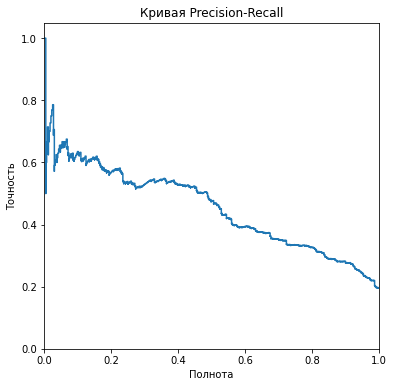

Лучший порог: 0.3250000000000001

Площадь под ROC-кривой: 0.7704631397239631


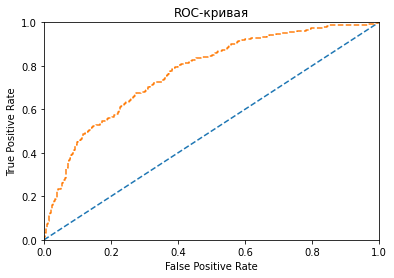

МЕТРИКИ
Правильность: 0.806
Точность: 0.5039787798408488
Полнота: 0.4859335038363171
F1-мера: 0.4947916666666667

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1422
Ложно-отрицательные ответы: 201
Истинно-положительные ответы: 190
Ложно-положительные ответы: 187


In [100]:
# Обучаем модель LogisticRegression.

model_lr_5 = LogisticRegression(random_state=12345, solver='liblinear')
model_lr_5.fit(ft, tt)
probabilities_valid = model_lr_5.predict_proba(fv)

f1_max = 0
best_threshold = 0
for threshold in np.arange(0.2, 0.5, 0.005):
    predicted = probabilities_valid[:, 1] > threshold
    f1 = f1_score(target_valid, predicted)
    if f1 > f1_max:
        f1_max = f1
        best_threshold = threshold

print('Модель:', model_lr_5)
metrics(model_lr_5)
best_threshold_lr = best_threshold

2. Классификатор дерева решений.

Модель: DecisionTreeClassifier(max_depth=7, random_state=12345)
Лучшая максимальная глубина: 7


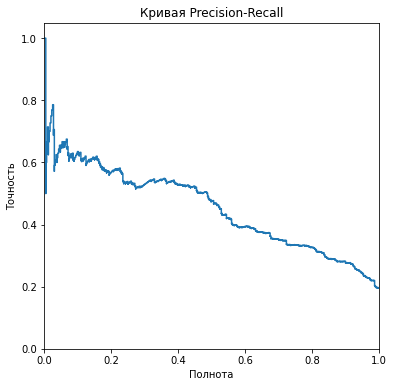

Лучший порог: 0.33500000000000013

Площадь под ROC-кривой: 0.8281207529894979


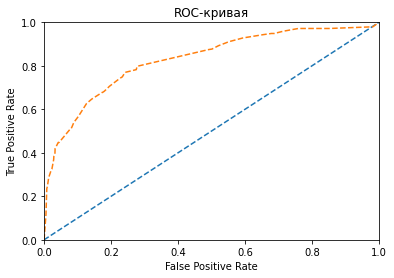

МЕТРИКИ
Правильность: 0.833
Точность: 0.5736434108527132
Полнота: 0.5677749360613811
F1-мера: 0.5706940874035991

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1444
Ложно-отрицательные ответы: 169
Истинно-положительные ответы: 222
Ложно-положительные ответы: 165


In [101]:
# Обучаем модели DecisionTreeClassifier.
# Выбираем модель с максимальным значением F1-меры.

model_dt_5 = best_dt()[0]
best_threshold = best_dt()[1]

print('Модель:', model_dt_5)
print('Лучшая максимальная глубина:', model_dt_5.max_depth)
metrics(model_dt_5)
best_threshold_dt = best_threshold

3. Классификатор случайного леса.

Модель: RandomForestClassifier(max_depth=9, n_estimators=50, random_state=12345)
Лучшее количество деревьев: 50
Лучшая максимальная глубина: 9


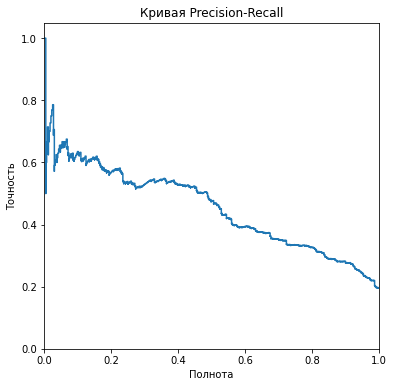

Лучший порог: 0.33500000000000013

Площадь под ROC-кривой: 0.8518706317882626


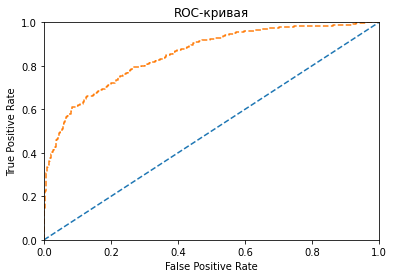

МЕТРИКИ
Правильность: 0.8565
Точность: 0.6485714285714286
Полнота: 0.5805626598465473
F1-мера: 0.6126855600539811

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1486
Ложно-отрицательные ответы: 164
Истинно-положительные ответы: 227
Ложно-положительные ответы: 123
CPU times: user 37.6 s, sys: 308 ms, total: 37.9 s
Wall time: 38 s


In [102]:
%%time
# Обучаем модели RandomForestClassifier.
# Выбираем модель с максимальным значением F1-меры.
# Время обработки - до 30 сек (!)

model_rf_5 = best_rf()[0]
best_threshold = best_dt()[1]

print('Модель:', model_rf_5)
print('Лучшее количество деревьев:', model_rf_5.n_estimators)
print('Лучшая максимальная глубина:', model_rf_5.max_depth)
metrics(model_rf_5)
best_threshold_rf = best_threshold

_Итоги_

1. Проведено обучение моделей тех же трех структур (логистической регрессии, дерева решений и случайного леса), но уже с учетом дисбаланса классов в целевом признаке. Применено 4 разных подхода: взвешивание классов, увеличение и уменьшение выборки, а также изменение порога классификации. Первый подход (сбалансирование весов классов) дал следующие значения F1-меры: 0.47, 0.56, 0.61, соответственно.


2. При втором подходе количество строк, содержащих положительный класс целевого признака (единицы), было увеличено вчетверо. Обучение дало следующие результаты: 0.48, 0.56, 0.62, соответственно.


3. При третьем подходе количество строк, содержащих отрицательный класс целевого признака (нули), было уменьшено вчетверо. Обучение дало следующие результаты: 0.47, 0.55, 0.57, соответственно.


4. Наконец, в результате четвертого подхода, при котором были предсказаны не сами значения классов, а их вероятности, были подобраны оптимальные значения порога классификации для всех трех типов моделей. В результате были получены следующие значения F1-меры: 0.49, 0.57, 0.61, соответственно.

## Тестирование модели

### Проверка модели на тестовой выборке

Перед выбором оптимальной модели подытожим все полученные в результате промежуточных проверок на валидационной выборке значения F1-меры.

In [103]:
# Таблица с полученными значениями F1-меры
# Названия столбцов - типы обучаемых моделей.
# Индексы - варианты обучения:
# - на немасштабированных данных (и без учета баланса);
# - на масштабированных данных (но без учета баланса);
# - со взвешенными классами;
# - с увеличением выборки;
# - с уменьшением выборки;
# - с изменением порога классификации.

models = [[model_lr  , model_dt  , model_rf  ], 
          [model_lr_1, model_dt_1, model_rf_1], 
          [model_lr_2, model_dt_2, model_rf_2],
          [model_lr_3, model_dt_3, model_rf_3],
          [model_lr_4, model_dt_4, model_rf_4],
          [model_lr_5, model_dt_5, model_rf_5]]

thresholds = [best_threshold_lr, best_threshold_dt, best_threshold_rf]

f1_table = []

f1_list = []
for i in range(3):
    predicted_valid = models[0][i].predict(features_valid_unscaled)
    f1 = f1_score(target_valid, predicted_valid)
    f1_list.append(round(f1, 4))
f1_table.append(f1_list)

for row in models[1:5]:
    f1_list = []
    for m in row:
        predicted_valid = m.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        f1_list.append(round(f1, 4))
    f1_table.append(f1_list)

f1_list = []
for i in range(3):
    probabilities_valid = models[5][i].predict_proba(features_valid)
    predicted_valid = probabilities_valid[:, 1] > thresholds[i]
    f1 = f1_score(target_valid, predicted_valid)
    f1_list.append(round(f1, 4))
f1_table.append(f1_list)

structures = ['Log. Regression', 'Decision Tree', 'Random Forest']
methods = ['Unscaled', 'Scaled', 'Balanced', 'Upsampled', 'Downsampled', 'Threshold']
f1_table = pd.DataFrame(f1_table, columns=structures, index=methods)
f1_table.index.name = 'F1 score'
f1_table

,Log. Regression,Decision Tree,Random Forest
F1 score,,,
Unscaled,0.1029,0.5521,0.5664
Scaled,0.3045,0.5521,0.5719
Balanced,0.4742,0.5587,0.6117
Upsampled,0.4754,0.5587,0.6211
Downsampled,0.4754,0.5587,0.6211
Threshold,0.4948,0.5707,0.6127


Аналогично, просмотрим значения площади под ROC-кривой.

In [104]:
# Таблица с полученными значениями AUC-ROC

auc_roc_table = []

auc_roc_list = []
for i in range(3):
    probabilities_valid = models[0][i].predict_proba(features_valid_unscaled)
    auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
    auc_roc_list.append(round(auc_roc, 4))
auc_roc_table.append(auc_roc_list)

for row in models[1:]:
    auc_roc_list = []
    for m in row:
        probabilities_valid = m.predict_proba(features_valid)
        auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
        auc_roc_list.append(round(auc_roc, 4))
    auc_roc_table.append(auc_roc_list)

auc_roc_table = pd.DataFrame(auc_roc_table, index=methods, columns=structures)
auc_roc_table.index.name = 'AUC-ROC'
auc_roc_table

,Log. Regression,Decision Tree,Random Forest
AUC-ROC,,,
Unscaled,0.6815,0.8281,0.8447
Scaled,0.7705,0.8281,0.8443
Balanced,0.7727,0.8091,0.8518
Upsampled,0.7727,0.8091,0.8484
Downsampled,0.7727,0.8091,0.8484
Threshold,0.7705,0.8281,0.8519


Наиболее удачными оказались модели из структуры "Классификатор случайного леса", конкретно - model_rf_2 (сбалансированная), model_rf_3 (с увеличенной выборкой) и model_rf_5 (с регулировкой порога).

Сравним качества этих моделей на тестовой выборке.

In [81]:
# Вычисляем F1-меру у трех лучших моделей (model_rf_2, model_rf_3, model_rf_5).

predicted_test_2 = model_rf_2.predict(features_test)
f1_2 = f1_score(target_test, predicted_test_2)

predicted_test_3 = model_rf_3.predict(features_test)
f1_3 = f1_score(target_test, predicted_test_3)

probabilities_test_5 = model_rf_5.predict_proba(features_test)
predicted_test_5 = probabilities_test_5[:, 1] > best_threshold_rf
f1_5 = f1_score(target_test, predicted_test_5)

print('F1-мера модели "model_rf_2":', f1_2)
print('F1-мера модели "model_rf_3":', f1_3)
print('F1-мера модели "model_rf_5":', f1_5)

F1-мера модели "model_rf_2": 0.6221692491060787
F1-мера модели "model_rf_3": 0.6177215189873417
F1-мера модели "model_rf_5": 0.6293532338308457


Лучший показатель оказался у модели "model_rf_5".


Модель: RandomForestClassifier(max_depth=9, n_estimators=50, random_state=12345)
Количество деревьев: 50
Максимальная глубина: 9

Площадь под ROC-кривой: 0.8671879536261058


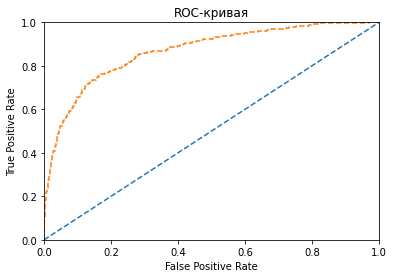

Порог классификации: 0.33500000000000013 

МЕТРИКИ
Правильность: 0.851
Точность: 0.6710875331564987
Полнота: 0.5925058548009368
F1-мера: 0.6293532338308457

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1449
Ложно-отрицательные ответы: 174
Истинно-положительные ответы: 253
Ложно-положительные ответы: 124


In [82]:
# Выводим все данные и показатели качества модели "model_rf_5".

probabilities_test = model_rf_5.predict_proba(features_test)

print('\nМодель:', model_rf_5)
print('Количество деревьев:', model_rf_5.n_estimators)
print('Максимальная глубина:', model_rf_5.max_depth)

auc_roc = roc_auc_score(target_test, probabilities_test[:, 1])
print('\nПлощадь под ROC-кривой:', auc_roc)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_test[:, 1])
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, linestyle='--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

predicted_test = probabilities_test[:, 1] > best_threshold_rf
print('Порог классификации:', best_threshold_rf, '\n')

accuracy = accuracy_score(target_test, predicted_test)
precision = precision_score(target_test, predicted_test)
recall = recall_score(target_test, predicted_test)
f1 = f1_score(target_test, predicted_test)
matrix = confusion_matrix(target_test, predicted_test)
print('МЕТРИКИ')
print('Правильность:', accuracy)
print('Точность:', precision)
print('Полнота:', recall)
print('F1-мера:', f1)
print('\nМАТРИЦА ОШИБОК')
print('Истинно-отрицательные ответы:', matrix[0, 0])
print('Ложно-отрицательные ответы:', matrix[1, 0])
print('Истинно-положительные ответы:', matrix[1, 1])
print('Ложно-положительные ответы:', matrix[0, 1])

Как видим, значение F1-меры составило почти 0.63, значение AUC-ROC - почти 0.87.

### Проверка модели на адекватность

Для проверки обученной модели на адекватность сравним ее качество с качеством фиктивных моделей с помощью структуры DummyClassifier.

Создадим функцию, аналогичную metrics(), для сокращения кода.

In [83]:
# Функция для вывода метрик и матрицы ошибок для фиктивных моделей

def metrics_dummy():
    
    model_dummy.fit(features_train, target_train)
    probabilities_dummy = model_dummy.predict_proba(features_test)
    
    print('Модель:', model_dummy)

    auc_roc = roc_auc_score(target_test, probabilities_dummy[:, 1])
    print('\nПлощадь под ROC-кривой:', auc_roc)
    
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_dummy[:, 1])
    plt.figure()
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, linestyle='--')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
       
    predicted_dummy = model_dummy.predict(features_test)
    
    accuracy = accuracy_score(target_test, predicted_dummy)
    precision = precision_score(target_test, predicted_dummy, zero_division=0)
    recall = recall_score(target_test, predicted_dummy, zero_division=0)
    f1 = f1_score(target_test, predicted_dummy, zero_division=0)
    matrix = confusion_matrix(target_test, predicted_dummy)   
    print('МЕТРИКИ')
    print('Правильность:', accuracy)
    print('Точность:', precision)
    print('Полнота:', recall)
    print('F1-мера:', f1)
    print('\nМАТРИЦА ОШИБОК')
    print('Истинно-отрицательные ответы:', matrix[0, 0])
    print('Ложно-отрицательные ответы:', matrix[1, 0])
    print('Истинно-положительные ответы:', matrix[1, 1])
    print('Ложно-положительные ответы:', matrix[0, 1])

Модель: DummyClassifier(constant=0, strategy='constant')

Площадь под ROC-кривой: 0.5


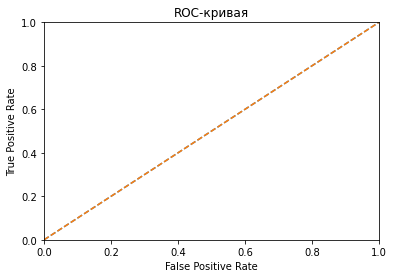

МЕТРИКИ
Правильность: 0.7865
Точность: 0.0
Полнота: 0.0
F1-мера: 0.0

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1573
Ложно-отрицательные ответы: 427
Истинно-положительные ответы: 0
Ложно-положительные ответы: 0


In [84]:
# Проверяем качество модели DummyClassifier на тестовой выборке,
# со стратегией "constant = 0" (с постоянными значениями, равными нулю).

model_dummy = DummyClassifier(strategy="constant", constant=0)
metrics_dummy()

Модель: DummyClassifier(constant=1, strategy='constant')

Площадь под ROC-кривой: 0.5


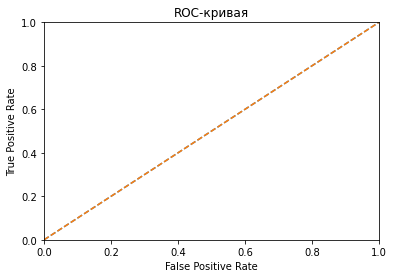

МЕТРИКИ
Правильность: 0.2135
Точность: 0.2135
Полнота: 1.0
F1-мера: 0.3518747424804285

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 0
Ложно-отрицательные ответы: 0
Истинно-положительные ответы: 427
Ложно-положительные ответы: 1573


In [85]:
# Проверяем качество модели DummyClassifier на тестовой выборке,
# со стратегией "constant = 1" (с постоянными значениями, равными единице).

model_dummy = DummyClassifier(strategy="constant", constant=1)
metrics_dummy()

Модель: DummyClassifier(random_state=12345, strategy='uniform')

Площадь под ROC-кривой: 0.5


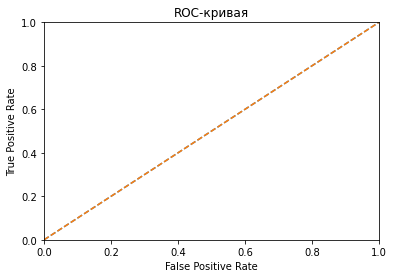

МЕТРИКИ
Правильность: 0.511
Точность: 0.2274975272007913
Полнота: 0.5386416861826698
F1-мера: 0.3198887343532684

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 792
Ложно-отрицательные ответы: 197
Истинно-положительные ответы: 230
Ложно-положительные ответы: 781


In [86]:
# Проверяем качество модели DummyClassifier на тестовой выборке,
# со стратегией "uniform" (выбор случайных значений с равной вероятностью).

model_dummy = DummyClassifier(strategy="uniform", random_state=12345)
metrics_dummy()

Модель: DummyClassifier(random_state=12345, strategy='stratified')

Площадь под ROC-кривой: 0.5226063057657693


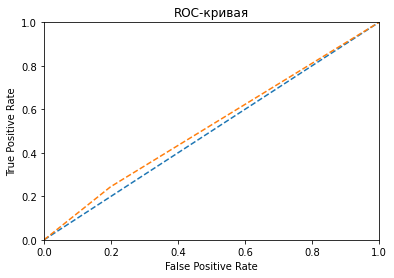

МЕТРИКИ
Правильность: 0.6825
Точность: 0.25
Полнота: 0.24355971896955503
F1-мера: 0.24673784104389085

МАТРИЦА ОШИБОК
Истинно-отрицательные ответы: 1261
Ложно-отрицательные ответы: 323
Истинно-положительные ответы: 104
Ложно-положительные ответы: 312


In [87]:
# Проверяем качество модели DummyClassifier на тестовой выборке,
# со стратегией "stratified" (выбор случайных значений пропорционально частотам в выборке).

model_dummy = DummyClassifier(strategy="stratified", random_state=12345)
metrics_dummy()

_Итоги_

1. В результате обучения моделей на тренировочной выборке и предварительной проверки на валидационной выявились следующие закономерности:

    1) Структура LogisticRegression очень чувствительна к стандартизации данных. При обучении модели на немасштабированных выборках значение F1-меры наиболее низкое - 0.10. После масштабирования - 0.30. При дальнейшим балансировании данных результат снова выше - около 0.48 (примерно одинаков при всех подходах).

    2) DecisionTreeClassifier и RandomForestClassifier не зависят от масштабирования и практически не реагируют на изменение балансов. У дерева решений значение F1-меры во всех случаях примерно постоянное - около 0.55-0.57. У случайного леса это значение колеблется в районе 0.57-0.62.

    3) В целом, при выборе подхода в борьбе с дисбалансом необходимо учитывать, что уменьшение выборки отрицательно влияет на значение F1-меры. В случае с "деревьями" - результат может быть даже хуже, чем вообще без балансирования. взвешивание классов, увеличение выборки и подбор нужного порога имеют практически одинаковый эффект на данную метрику. 

    4) Из трех структур наименьшую эффективность демонстрирует логистическая регрессия, наибольшую - классификатор случайного леса. При большем объеме данных (хотя бы на порядок) в целях экономии временных и прочих ресурсов было бы целесообразнее выбрать классификатор дерева решений, как одновременно эффективный и незатратный вариант. Однако в нашем случае выбор однозначен в пользу RandomForestClassifier.

    5) Что касается метрики AUC-ROC (площадь под ROC-кривой), ее значение не сильно менялось при разных стадиях и подходах в процессе обучения. У логистической регрессии оно составило 0.77 (до масштабирования - 0.68), у дерева решений - 0.81-0.83, у случайного леса - 0.84-0.85.


2. Лучшими оказались модели RandomForestClassifier: model_rf_2, model_rf_3 и model_rf_5. Проверка на тестовой выборке подтвердила их эффективность. Наиболее высокое качество продемонстрировала модель model_rf_5. Значение F1-меры составило 0.63, AUC-ROC - 0.87. Остальные метрики: правильность (accuracy) - 0.85, точность (precision) - 0.67, полнота (recall) - 0.59.


3. Для проверки адекватности обученной модели ее результаты сравнены с результатами фиктивных моделей DummyClassifier со следующими стратегиями: "uniform", "stratified", "constant=0" и "constant=1". у всех этих моделей, как и ожидалось, значение F1-меры меньше, чем у обученной. Тест на вменяемость пройден. Модель model_rf_5 абсолютно адекватна и готова к дальнейшим предсказаниям.

## Общие выводы

_Итоги исследования и выводы_

1. Согласно маркетинговым исследованиям "Бета-Банка", сохранять текущих клиентов дешевле, чем привлекать новых. Банку, из которого происходит постоянный отток клиентов в заметных масштабах, необходимо было составить модель, прогнозирующую, уйдет каждый конкретный клиент в ближайшее время или нет. Для работы были предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. Цель исследования - построить модель с предельно большим значением F1-меры (не менее 0.59). Дополнительно рекомендуется измерять AUC-ROC, сравнивая ее значение с F1-мерой.


2. В предоставленной таблице было 10000 строк (в каждой информация об одном клиенте банка) и 14 столбцов. 3 из них ("Surname", "Geography", "Gender") с категориальными данными, тип - object. Еще 5 ("RowNumber", "CustomerId" - порядковый № и ID; "HasCrCard", "IsActiveMember", "Exited" - бинарные данные (наличие/отсутствие признака)) - с фактически категориальными признаками, тип - int. В оставшихся столбцах количественные данные, тип - float (столбцы "Tenure", "Balance" и "EstimatedSalary") и int (остальные).


3. Результаты предобработки данных следующие. В столбце "Tenure" (срок пребывания в качестве клиента) были пропущенные данные, которые удалось восстановить с помощью исходного файла, доступного по ссылке. В обновленном датафрейме указанный столбец не имеет пропусков, тип данных - целочисленный. При обработке названия всех столбцов переведены в "змеиный" регистр. Нулевые значения, имевшиеся в некоторых столбцах, вписываются в рамки нормы. Среди категориальных данных странностей также не обнаружено. Аномальных значений в статистиках количественных параметров не наблюдается. Полных дубликатов среди строк нет. Корреляции внутри признаков отсутствуют. Возраст большинства отказавшихся от услуг банка клиентов составляет 50-55 лет.


4. Из исходного датафрейма выделены два набора данных: "features" с признаками для обучающей модели (кредитный рейтинг, страна, пол, возраст, срок пребывания в качестве клиента, баланс счета, количество банковских продуктов, наличие кредитной карты, активность клиента, предполагаемая зарплата), а также "target" с целевым признаком (факт ухода клиента). Столбцы с категориальными признаками (страна и пол) были преобразованы с помощью техники OHE, с удалением первых столбцов. Каждый из двух указанных наборов данных был разбит на три части: 60% - на тренировочную выборку, 20% - на валидационную, 20% - на тестовую.


5. Значения в столбцах с признаками имеют разный масштаб. Проведено первичное обучение 3 моделей (логистической регрессии, дерева решений и случайного леса) на немасштабированных данных. Значения F1-меры составили: LR - 0.10, DT - 0.55, RF - 0.57. После чего произведено масштабирование количественных признаков во всех трех выборках путем их стандартизации. Проведено вторичное обучение моделей. Значения F1-меры составили: LR - 0.30, DT - 0.55, RF - 0.57.


6. В целевом признаке наблюдается дисбаланс - 4:1 в пользу отрицательного класса. Проведено еще 4 цикла обучения моделей тех же трех структур, но уже с учетом дисбаланса. 
    Применены следующие подходы: 
 - 1) взвешивание классов (аргументу class_weight обучаемых моделей присвоено значение "balanced");
 - 2) upsampling (количество строк целевого признака, содержащих положительный класс, увеличено в 4 раза);
 - 3) downsampling (количество строк целевого признака, содержащих отрицательный класс, уменьшено в 4 раза);
 - 4) изменение порога классификации (подобраны оптимальные значения порога классификации для каждого типа модели).  
   Примененные подходы дали следующие значения F1-меры: LR - от 0.47 до 0.49, DT - от 0.55 до 0.57, RF - от 0.57 до 0.62.


7. Структура LogisticRegression очень чувствительна и к масштабированию данных, и к балансу классов. DecisionTreeClassifier и RandomForestClassifier не зависят от масштабирования и очень слабо реагируют на изменение балансов. В целом, уменьшение выборки снижает значение F1-меры (иногда делая ее даже ниже, чем до балансирования). Взвешивание классов, увеличение выборки и подбор нужного порога имеют практически одинаковый эффект на данную метрику. Что касается метрики AUC-ROC, ее значение не сильно менялось при разных стадиях и подходах в процессе обучения: LR - 0.77 (но до масштабирования - 0.68), DT - от 0.81 до 0.83, RF - от 0.84 до 0.85. Из трех указанных структур наименьшую эффективность демонстрирует логистическая регрессия, наибольшую - классификатор случайного леса.

 
8. Лучшими оказались модели RandomForestClassifier: model_rf_2 (сбалансированная), model_rf_3 (с увеличенной выборкой) и model_rf_5 (с регулировкой порога). Наиболее высокое качество из них при проверке на тестовой выборке продемонстрировала модель model_rf_5. Значение F1-меры составило более 0.63, AUC-ROC - 0.87. Проверку адекватности (через сравнение с результатами константных и случайных моделей структуры DummyClassifier) модель прошла успешно. Цель исследования достигнута. Значение F1-меры превысило требуемое (0.59) на 0.04 пункта.

_Дополнительные выводы_

Поиск модели, дающей максимальное значение F1-меры, имеет важный смысл. Сама данная метрика складывается из сочетания точности и полноты, а именно является их средней гармонической. Точность равна отношению истинно-положительных ответов к их сумме с ложно-положительными (TP/(TP+FP)). Полнота же равна отношению истинно-положительных ответов к их сумме с ложно-отрицательными (TP/(TP+FN)). Т.е. их отличие только в одном из слагаемых в знаменателе (FP или FN). Если на место этих двух разных слагаемых вписать их среднее арифметическое ((FP+FN)/2, или просто F/2), то мы как раз получим F1-меру. Таким образом, эта метрика придает одинаковую важность точности и полноте. 

Точность для банка - это доля не зря потраченных ресурсов на предупреждение ухода клиентов: на их обзвон, на рекламную кампанию для их удержания, на скидки, различные акции и дополнительные бонусы. Все это важно, поскольку связано с расходом денег и времени. Полнота же - это доля вовремя удержанных клиентов, которые останутся и воспользуются новыми услугами, которые не переложат свои вклады в конкурирующие банки, не откажутся от расчетно-кассового обслуживания, от кредитов и кредитных карт. Это так же важно, поскольку связано с возможным недополучением прибыли.

С другой стороны, важный смысл имеет также метрика AUC-ROC, или площадь под ROC-кривой. Эта кривая наглядно показывает соотношение между полезным качеством - способностью правильно выявлять потенциально уходящих, и вредным - склонностью ошибочно считать уходящими тех, кто уходить не думал. Кривая образована множеством точек, координатами которых являются значения двух метрик: по оси ординат - TPR (доля истинно-положительных ответов от реально положительных значений, т.е. та же полнота, она же - чувствительность), а по оси абсцисс - FPR (доля ложно-положительных ответов от реально отрицательных значений, она же - единица минус специфичность).

Если TPR - это доля клиентов, которых банк догадался вовремя удержать, от всего их количества, кого нужно было удерживать, то FPR - это доля ошибочно выбранных клиентов от общего числа тех, кто не собирался никуда уходить. Иными словами, TPR - доля правильно понесенных расходов от всех необходимых расходов. А FPR - это доля зря понесенных затрат от всех потенциально ненужных затрат.

Смысл показателя AUC-ROC заключается в том, что он характеризует меру упорядоченности классов (единиц и нулей) при упорядоченности вероятностных оценок, т.е. насколько четко положительный класс будет отделен от отрицательного, если сделанные относительно них предсказания в виде вероятностей выстроить в порядке убывания (или возрастания). Иными словами, это более универсальная метрика и не зависит от порога вероятности, как остальные. 

Площадь под ROC-кривой состоит из сумм площадей множества четырехугольников, составленных из соседних точек на каждой из осей, и математически этот показатель сводится к некоему абстрактному, усредненному значению полноты, с учетом всех возможный порогов классификации. 

Таким образом, AUC-ROC указывает на общую способность модели правильно классифицировать и не учитывает соотношения оправданных расходов ко всем расходам, понесенным в связи с прогнозом (как учитывают F1-мера или точность). Данная метрика более нужна в тех случаях, когда правильность предсказания имеет гораздо большее значение, чем экономический эффект, т.е. интересы объекта исследования важнее, чем субъекта (например, при диагностике заболеваний). Для банка же важно учитывать все параметры, именно поэтому в данной работе в качестве основной была выбрана F1-мера.

Работа выполнена. Благодарю за внимание.

Варужан Погосян

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера️: </b> Круто. Спасибо за хороший подробный вывод!
</div>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b>
Мне очень понравилась твоя работа. Спасибо тебе большое, за хорошее оформление проекта и выводы к каждому этапу работы.
Чувствуется уверенное знание материала и владение питоном в целом. 
</div>
<font color='blue'><b>Но нужно кое-что поправить:</b></font>
<div class="alert alert-block alert-danger">
<ul>1) Убрать датасет с kaggle</ul>
<ul>2) Уменьшить дублирование кода</ul>
</div>

<font color='blue'><b>Осталось совсем немного, буду ждать твою работу на повторное ревью 🙂</b></font>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера v2: </b> Спасибо за интерес к проекту. Принято. Постарался ответить на все твои вопросы. Желаю дальнейших успехов в учёбе и на работе
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*